In [1]:
import sys
sys.path.append('../scripts')

import warnings
from pathlib import Path

import pandas as pd

from plot_utils import load_metrics, plot_map_per_config

warnings.filterwarnings("ignore", category=UserWarning)

#### Create configs for loading evalzoo results

In [2]:
RESULTS_DIR = Path("../2.evalzoo/results/")
MERTRICS_FILENAME = "metrics_level_1_ref"
FIGSAVE_PATH = Path("output/mAP_visualizations")

METRICS_COLUMNS = {
    "sim_retrieval_average_precision_ref_i_mean_i": "mAP",
    "sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i": "-log(pvalue)",
    "sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i": "-log(qvalue)",
}

ORF_GROUPBY_COLUMNS = {
    "same_well_diff_pert": ["Metadata_Well"],
    "same_pert_diff_well": ["Metadata_JCP2022"],
    "same_well_same_pert": ["Metadata_Well", "Metadata_JCP2022"],
}

GENE_GROUPBY_COLUMNS = {
    "same_well_diff_gene": ["Metadata_Well"],
    "same_gene_diff_well": ["Metadata_Symbol"],
    "same_well_same_gene": ["Metadata_Well", "Metadata_Symbol"],
}

#### List which results to plot

`Note:` in this version, results without cc adjustment (panels 1 and 3) did not unclude CC as a feature, unlike CC-adjusted results (panels 2 and 4)

In [3]:
# All results combined, see https://github.com/alxndrkalinin/position-effect-correction/blob/1d7c0b9ba8e93b7adb81ecc9df70f444a944d43a/3.correct/3_compare_metrics_subset.ipynb

# metrics = {
#     # subset -> robustMAD -> feature select -> metrics
#     "subset->preprocess\t\t\t": {
#         "same_well_diff_pert": "0e4cd68f",
#         "same_pert_diff_well": "ceb5f02a",
#         "same_well_same_pert": "34fbd8a4",
#     },
#     # subset -> well correct -> robustMAD -> feature select -> metrics
#     "subset->well_correct->preprocess\t": {
#         "same_well_diff_pert": "82ad004e",
#         "same_pert_diff_well": "f5c36cb4",
#         "same_well_same_pert": "d66f1bce",
#     },
#     # well correct -> robustMAD -> feature select -> subset -> metrics
#     "well_correct->subset->preprocess\t": {
#         "same_well_diff_pert": "3ec971b2",
#         "same_pert_diff_well": "72f94e10",
#         "same_well_same_pert": "138739c0",
#     },
#     # subset -> robustMAD -> feature select -> cell count correct -> metrics
#     "subset->preprocess->cc_correct\t": {
#         "same_well_diff_pert": "3701ed2c",
#         "same_pert_diff_well": "440d5bda",
#         "same_well_same_pert": "a69994b0",
#     },
#     # subset -> cell count correct -> robustMAD -> feature select -> metrics
#     "subset->cc_correct->preprocess\t": {
#         "same_well_diff_pert": "d2311b58",
#         "same_pert_diff_well": "5f53102a",
#         "same_well_same_pert": "e2bf955d",
#     },
#     # subset -> cell count correct -> well correct -> robustMAD -> feature select -> metrics
#     "subset->cc_correct->well_correct->preprocess\t": {
#         "same_well_diff_pert": "304eb132",
#         "same_pert_diff_well": "1b22d880",
#         "same_well_same_pert": "faa6ba3e",
#     },
# }

#### Individual ORF annotations

In [4]:
orf_metrics = {
    # subset -> robustMAD -> feature select -> metrics
    "subset->preprocess\t\t\t": {
        "same_well_diff_pert": "0e4cd68f",
        "same_pert_diff_well": "ceb5f02a",
        "same_well_same_pert": "34fbd8a4",
    },
    # subset -> cell count correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->preprocess\t": {
        "same_well_diff_pert": "d2311b58",
        "same_pert_diff_well": "5f53102a",
        "same_well_same_pert": "e2bf955d",
    },
    # subset -> well correct -> robustMAD -> feature select -> metrics
    "subset->well_correct->preprocess\t": {
        "same_well_diff_pert": "82ad004e",
        "same_pert_diff_well": "f5c36cb4",
        "same_well_same_pert": "d66f1bce",
    },
    # subset -> cell count correct -> well correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->well_correct->preprocess\t": {
        "same_well_diff_pert": "304eb132",
        "same_pert_diff_well": "1b22d880",
        "same_well_same_pert": "faa6ba3e",
    },
}

#### Gene symbol annotations

In [5]:
gene_metrics = {
    # subset -> robustMAD -> feature select -> metrics
    "subset->preprocess\t\t\t": {
        "same_well_diff_gene": "5ee8aabb",
        "same_gene_diff_well": "26efacc8",
        "same_well_same_gene": "758dee96",
    },
    # subset -> cell count correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->preprocess\t": {
        "same_well_diff_gene": "889ca0ab",
        "same_gene_diff_well": "790b8557",
        "same_well_same_gene": "5a048fe4",
    },
    # subset -> well correct -> robustMAD -> feature select -> metrics
    "subset->well_correct->preprocess\t": {
        "same_well_diff_gene": "c4c7aa12",
        "same_gene_diff_well": "ef524325",
        "same_well_same_gene": "61da8ae0",
    },
    # subset -> cell count correct -> well correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->well_correct->preprocess\t": {
        "same_well_diff_gene": "b8ad0e58",
        "same_gene_diff_well": "6fae5285",
        "same_well_same_gene": "b3ded838",
    },
}

#### Without image features

In [6]:
no_image_gene_metrics = {
    # subset -> robustMAD -> feature select -> metrics
    "subset->preprocess\t\t\t": {
        "same_well_diff_gene": "63526422",
        "same_gene_diff_well": "0cc6a4ec",
        "same_well_same_gene": "90b5b91d",
    },
    # subset -> cell count correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->preprocess\t": {
        "same_well_diff_gene": "adacbee3",
        "same_gene_diff_well": "2bde8689",
        "same_well_same_gene": "d4df76cd",
    },
    # subset -> well correct -> robustMAD -> feature select -> metrics
    "subset->well_correct->preprocess\t": {
        "same_well_diff_gene": "edaff3b6",
        "same_gene_diff_well": "263a5ff4",
        "same_well_same_gene": "306333dc",
    },
    # subset -> cell count correct -> well correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->well_correct->preprocess\t": {
        "same_well_diff_gene": "5eaae264",
        "same_gene_diff_well": "6fae5285",
        "same_well_same_gene": "0485b96b",
    },
}

#### PCA

In [19]:
pca_gene_metrics = {
    # subset -> robustMAD -> feature select -> metrics
    "subset->preprocess\t\t\t": {
        "same_gene_diff_well": "10792e71",
    },
    # subset -> cell count correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->preprocess\t": {
        "same_gene_diff_well": "fd50b01b",
    },
    # subset -> well correct -> robustMAD -> feature select -> metrics
    "subset->well_correct->preprocess\t": {
        "same_gene_diff_well": "64aa0540",
    },
    # subset -> cell count correct -> well correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->well_correct->preprocess\t": {
        "same_gene_diff_well": "df66eaf7",
    },
}

no_image_pca_gene_metrics = {
    # subset -> robustMAD -> feature select -> metrics
    "subset->preprocess\t\t\t": {
        "same_gene_diff_well": "ac65bc4b",
    },
    # subset -> cell count correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->preprocess\t": {
        "same_gene_diff_well": "66fd2a4d",
    },
    # subset -> well correct -> robustMAD -> feature select -> metrics
    "subset->well_correct->preprocess\t": {
        "same_gene_diff_well": "8a46f718",
    },
    # subset -> cell count correct -> well correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->well_correct->preprocess\t": {
        "same_gene_diff_well": "21b92180",
    },
}

In [8]:
cospca20_gene_metrics = {
    # subset -> robustMAD -> feature select -> metrics
    "subset->preprocess\t\t\t": {
        "same_gene_diff_well": "bcf32878",
    },
    # subset -> cell count correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->preprocess\t": {
        "same_gene_diff_well": "30f99c08",
    },
    # subset -> well correct -> robustMAD -> feature select -> metrics
    "subset->well_correct->preprocess\t": {
        "same_gene_diff_well": "703b13da",
    },
    # subset -> cell count correct -> well correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->well_correct->preprocess\t": {
        "same_gene_diff_well": "cd1b92de",
    },
}

cospca30_gene_metrics = {
    # subset -> robustMAD -> feature select -> metrics
    "subset->preprocess\t\t\t": {
        "same_gene_diff_well": "f86c9fcc",
    },
    # subset -> cell count correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->preprocess\t": {
        "same_gene_diff_well": "49abf604",
    },
    # subset -> well correct -> robustMAD -> feature select -> metrics
    "subset->well_correct->preprocess\t": {
        "same_gene_diff_well": "cdaf16db",
    },
    # subset -> cell count correct -> well correct -> robustMAD -> feature select -> metrics
    "subset->cc_adjust->well_correct->preprocess\t": {
        "same_gene_diff_well": "fefae721",
    },
}

#### Load evalzoo metrics

In [21]:
orf_metrics_df = load_metrics(
    orf_metrics, METRICS_COLUMNS, ORF_GROUPBY_COLUMNS, RESULTS_DIR, MERTRICS_FILENAME
)
print(orf_metrics_df.shape)

gene_metrics_df = load_metrics(
    gene_metrics, METRICS_COLUMNS, GENE_GROUPBY_COLUMNS, RESULTS_DIR, MERTRICS_FILENAME
)
print(gene_metrics_df.shape)

no_image_gene_metrics_df = load_metrics(
    no_image_gene_metrics, METRICS_COLUMNS, GENE_GROUPBY_COLUMNS, RESULTS_DIR, MERTRICS_FILENAME
)
print(gene_metrics_df.shape)

pca_gene_metrics_df = load_metrics(
    pca_gene_metrics, METRICS_COLUMNS, GENE_GROUPBY_COLUMNS, RESULTS_DIR, MERTRICS_FILENAME
)
print(pca_gene_metrics_df.shape)

no_image_pca_gene_metrics_df = load_metrics(
    no_image_pca_gene_metrics, METRICS_COLUMNS, GENE_GROUPBY_COLUMNS, RESULTS_DIR, MERTRICS_FILENAME
)
print(no_image_pca_gene_metrics_df.shape)

cospca20_gene_metrics_df = load_metrics(
    cospca20_gene_metrics, METRICS_COLUMNS, GENE_GROUPBY_COLUMNS, RESULTS_DIR, MERTRICS_FILENAME
)
print(cospca20_gene_metrics_df.shape)

cospca30_gene_metrics_df = load_metrics(
    cospca20_gene_metrics, METRICS_COLUMNS, GENE_GROUPBY_COLUMNS, RESULTS_DIR, MERTRICS_FILENAME
)
print(cospca30_gene_metrics_df.shape)

(16232, 8)
(17136, 8)
(17136, 8)
(1056, 7)
(1056, 7)
(1056, 7)
(1056, 7)


#### Plot mAP scatterplots and densities

same_well_diff_pert subset->preprocess			 mmAP: 0.148 p<0.05: 0.899 (331/368)
same_well_diff_pert subset->cc_adjust->preprocess	 mmAP: 0.0919 p<0.05: 0.543 (200/368)
same_well_diff_pert subset->well_correct->preprocess	 mmAP: 0.241 p<0.05: 0.864 (318/368)
same_well_diff_pert subset->cc_adjust->well_correct->preprocess	 mmAP: 0.391 p<0.05: 0.959 (353/368)


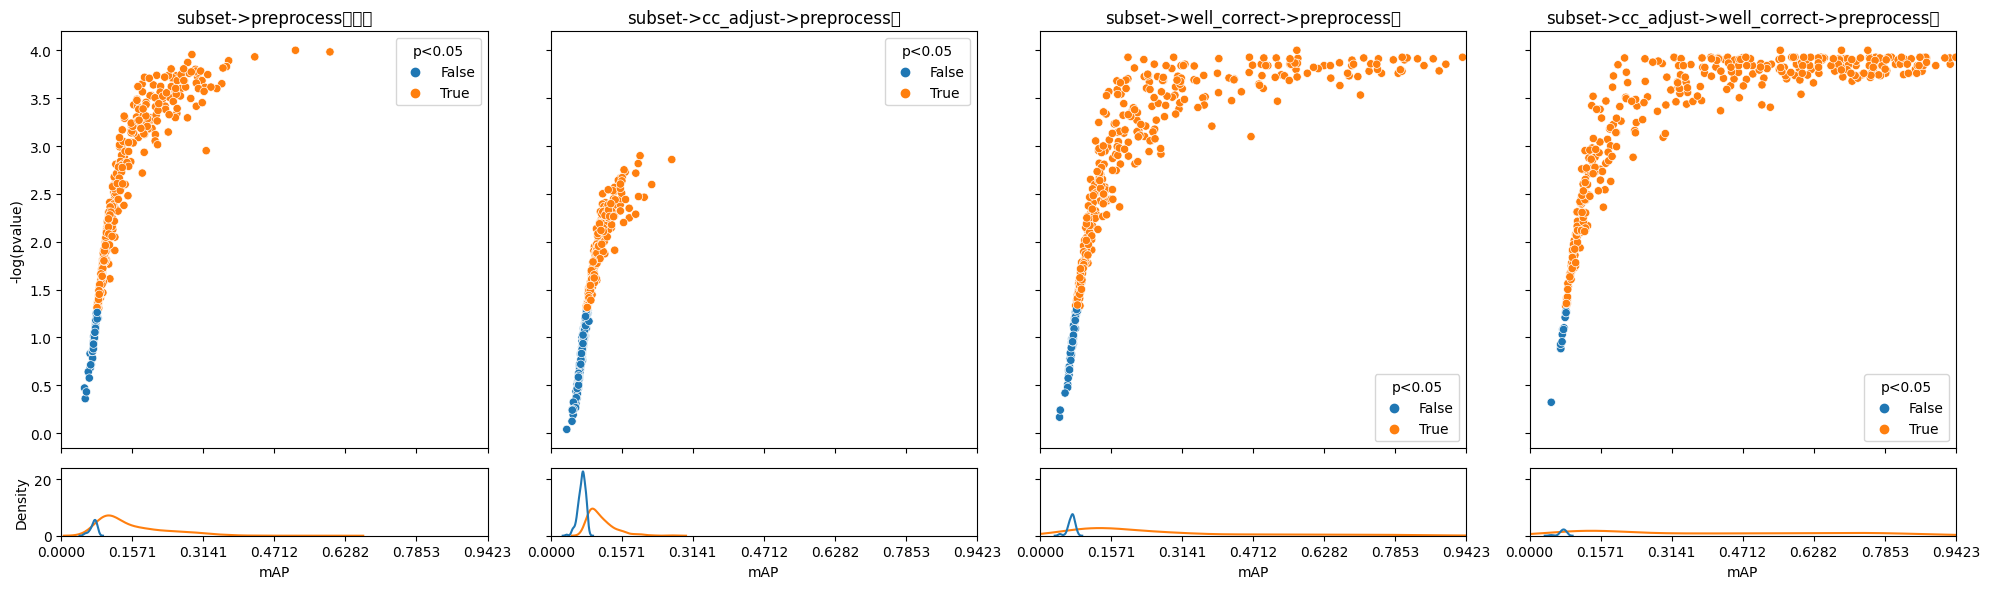

same_pert_diff_well subset->preprocess			 mmAP: 0.0341 p<0.05: 0.0811 (3/37)
same_pert_diff_well subset->cc_adjust->preprocess	 mmAP: 0.0314 p<0.05: 0.0541 (2/37)
same_pert_diff_well subset->well_correct->preprocess	 mmAP: 0.0505 p<0.05: 0.108 (4/37)
same_pert_diff_well subset->cc_adjust->well_correct->preprocess	 mmAP: 0.0274 p<0.05: 0.027 (1/37)


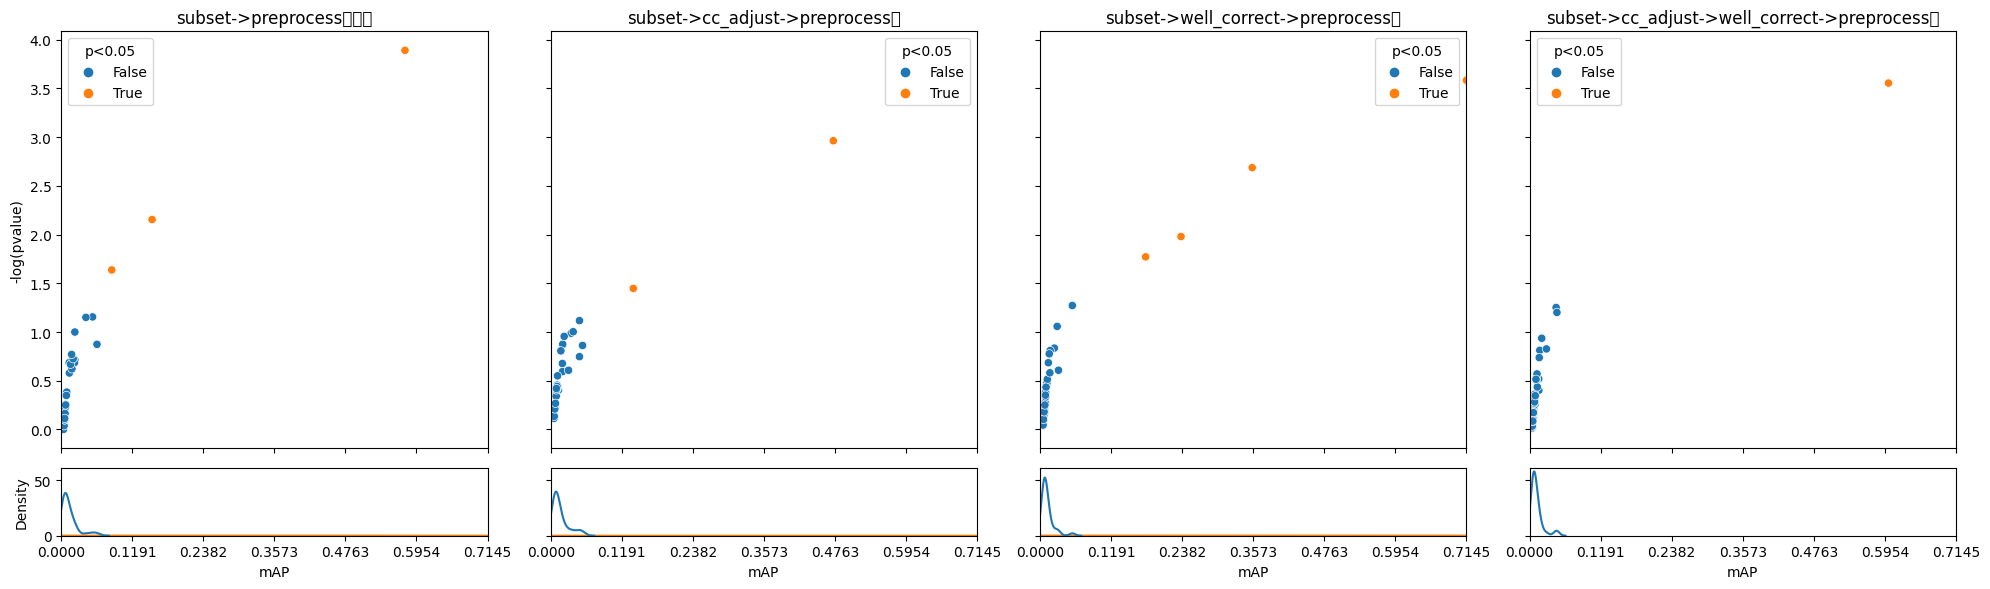

same_well_same_pert subset->preprocess			 mmAP: 0.211 p<0.05: 0.778 (2841/3653)
same_well_same_pert subset->cc_adjust->preprocess	 mmAP: 0.0863 p<0.05: 0.346 (1263/3653)
same_well_same_pert subset->well_correct->preprocess	 mmAP: 0.307 p<0.05: 0.857 (3130/3653)
same_well_same_pert subset->cc_adjust->well_correct->preprocess	 mmAP: 0.412 p<0.05: 0.929 (3394/3653)


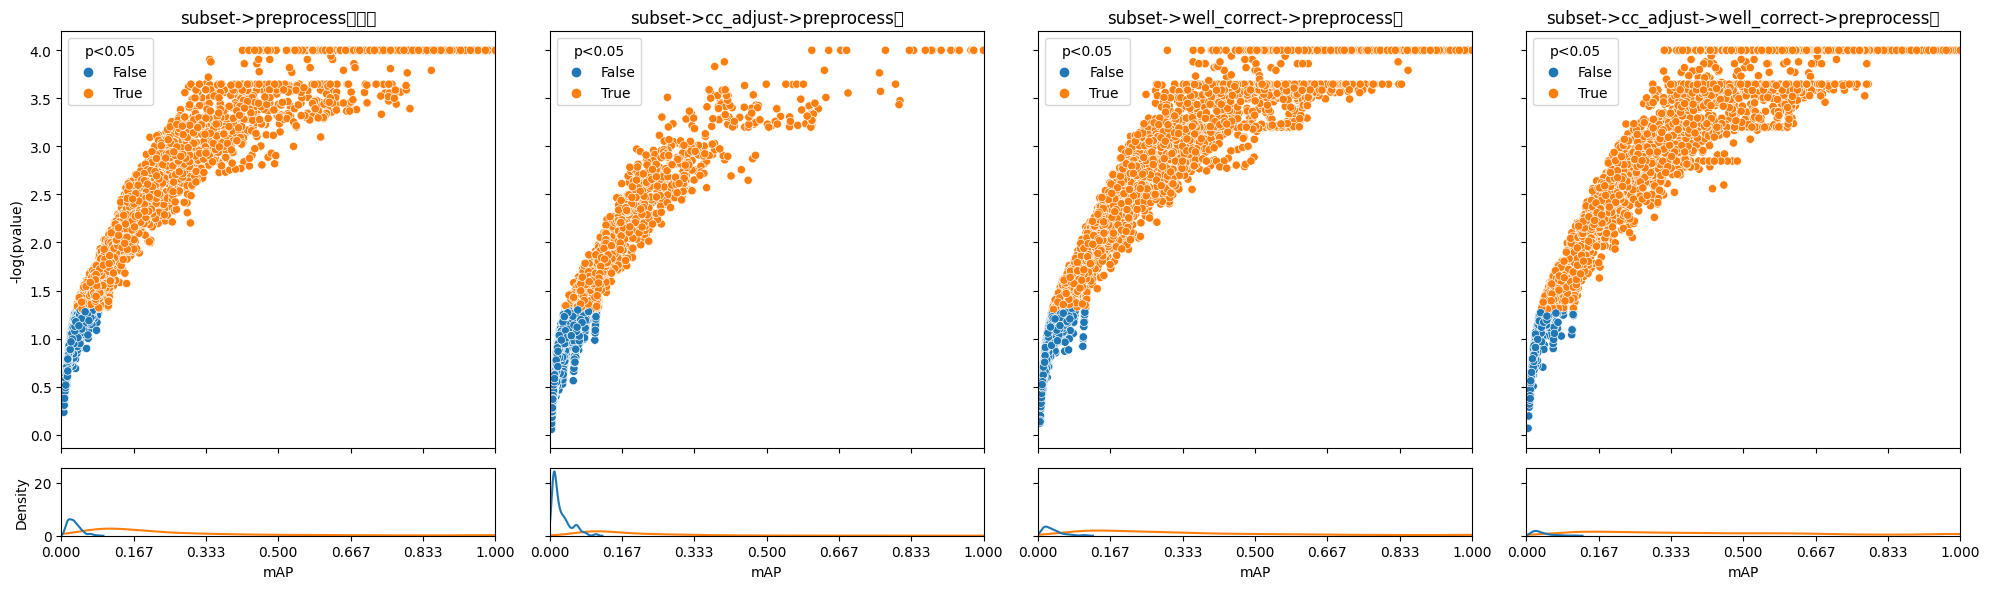

same_well_diff_gene subset->preprocess			 mmAP: 0.148 p<0.05: 0.899 (331/368)
same_well_diff_gene subset->cc_adjust->preprocess	 mmAP: 0.0919 p<0.05: 0.543 (200/368)
same_well_diff_gene subset->well_correct->preprocess	 mmAP: 0.241 p<0.05: 0.864 (318/368)
same_well_diff_gene subset->cc_adjust->well_correct->preprocess	 mmAP: 0.391 p<0.05: 0.959 (353/368)


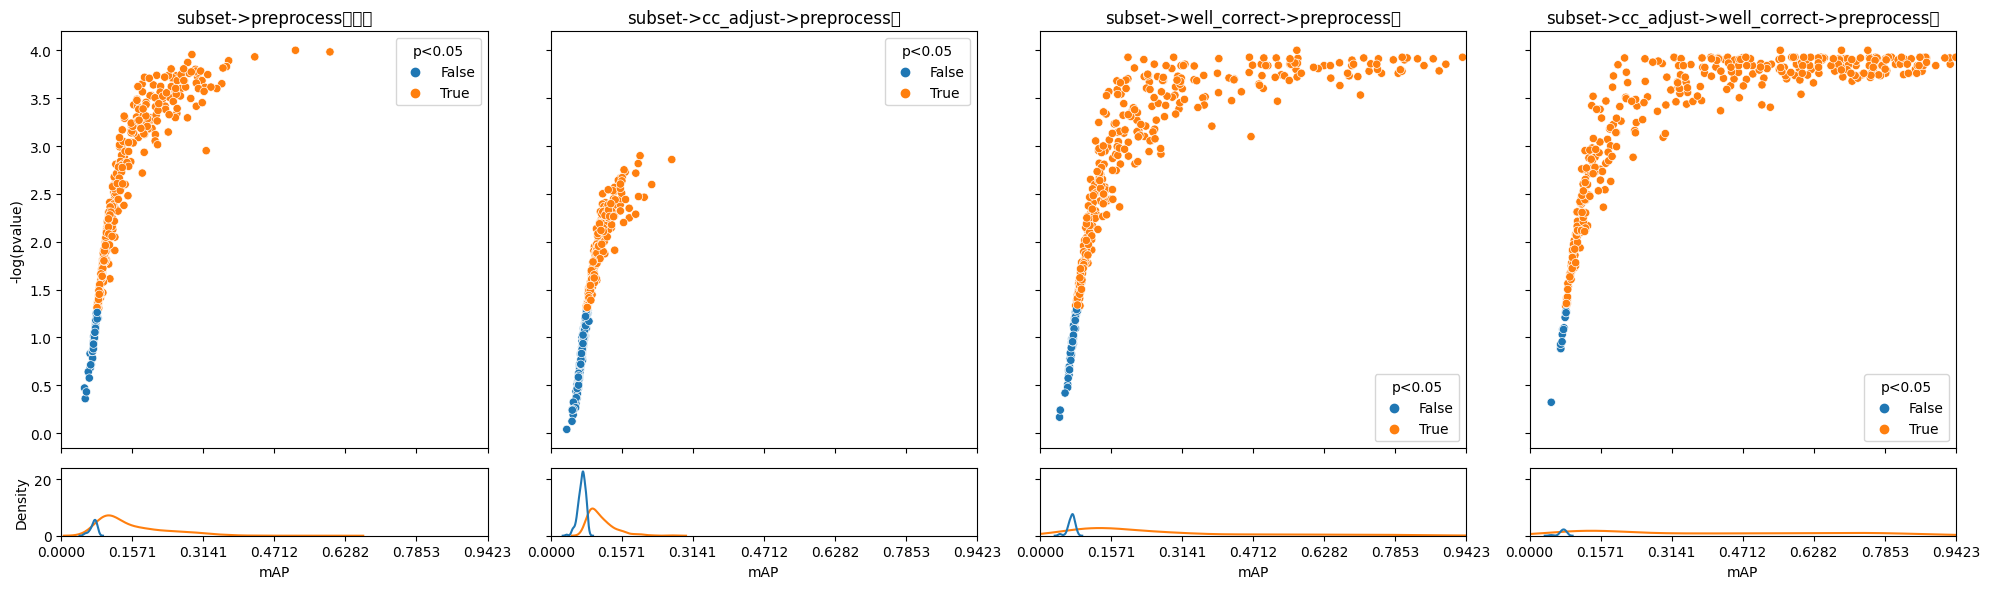

same_gene_diff_well subset->preprocess			 mmAP: 0.027 p<0.05: 0.102 (27/264)
same_gene_diff_well subset->cc_adjust->preprocess	 mmAP: 0.0233 p<0.05: 0.053 (14/264)
same_gene_diff_well subset->well_correct->preprocess	 mmAP: 0.027 p<0.05: 0.0606 (16/264)
same_gene_diff_well subset->cc_adjust->well_correct->preprocess	 mmAP: 0.0225 p<0.05: 0.0758 (20/264)


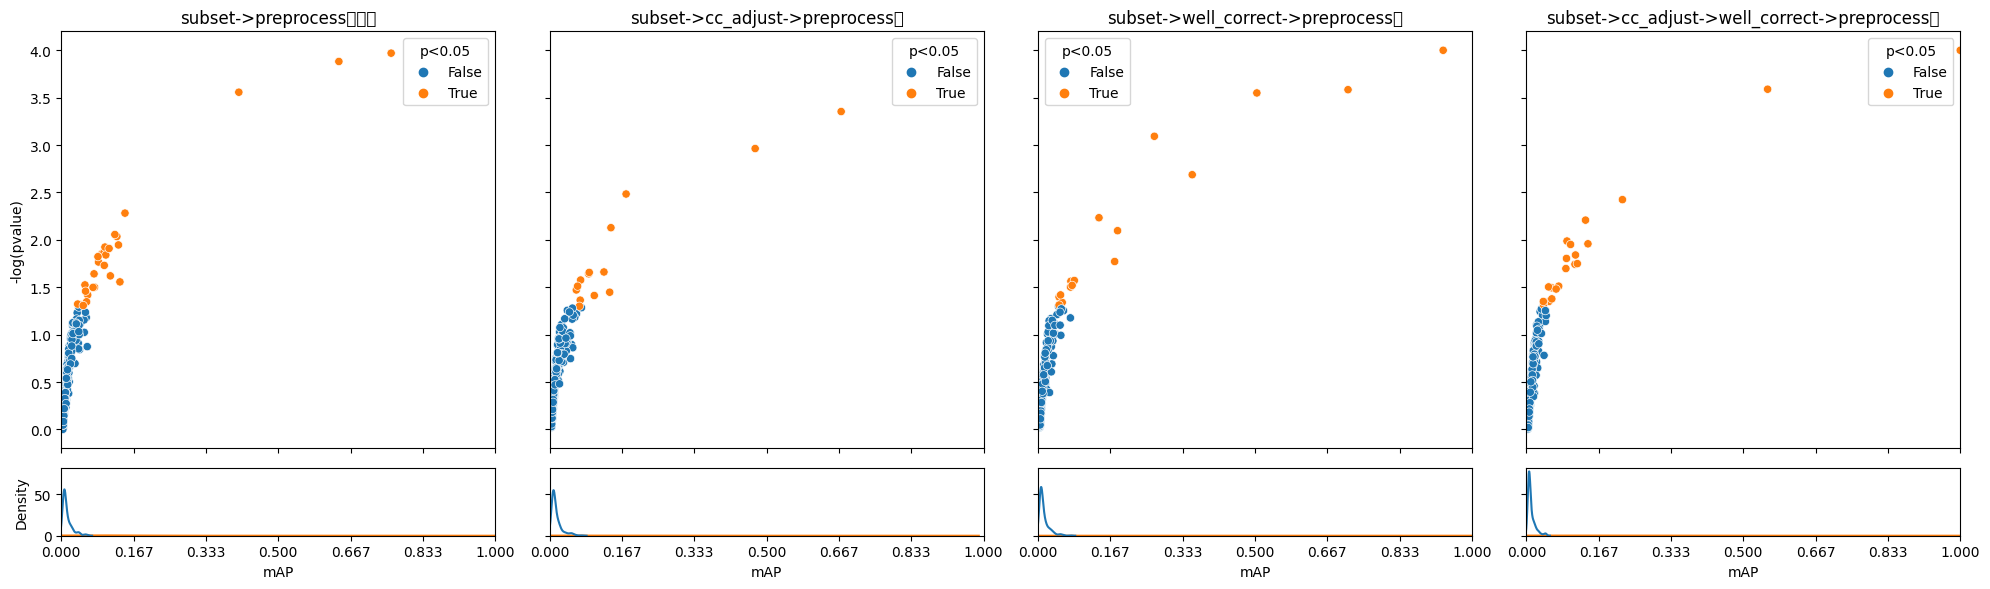

same_well_same_gene subset->preprocess			 mmAP: 0.211 p<0.05: 0.778 (2840/3652)
same_well_same_gene subset->cc_adjust->preprocess	 mmAP: 0.0863 p<0.05: 0.346 (1263/3652)
same_well_same_gene subset->well_correct->preprocess	 mmAP: 0.307 p<0.05: 0.857 (3129/3652)
same_well_same_gene subset->cc_adjust->well_correct->preprocess	 mmAP: 0.412 p<0.05: 0.929 (3393/3652)


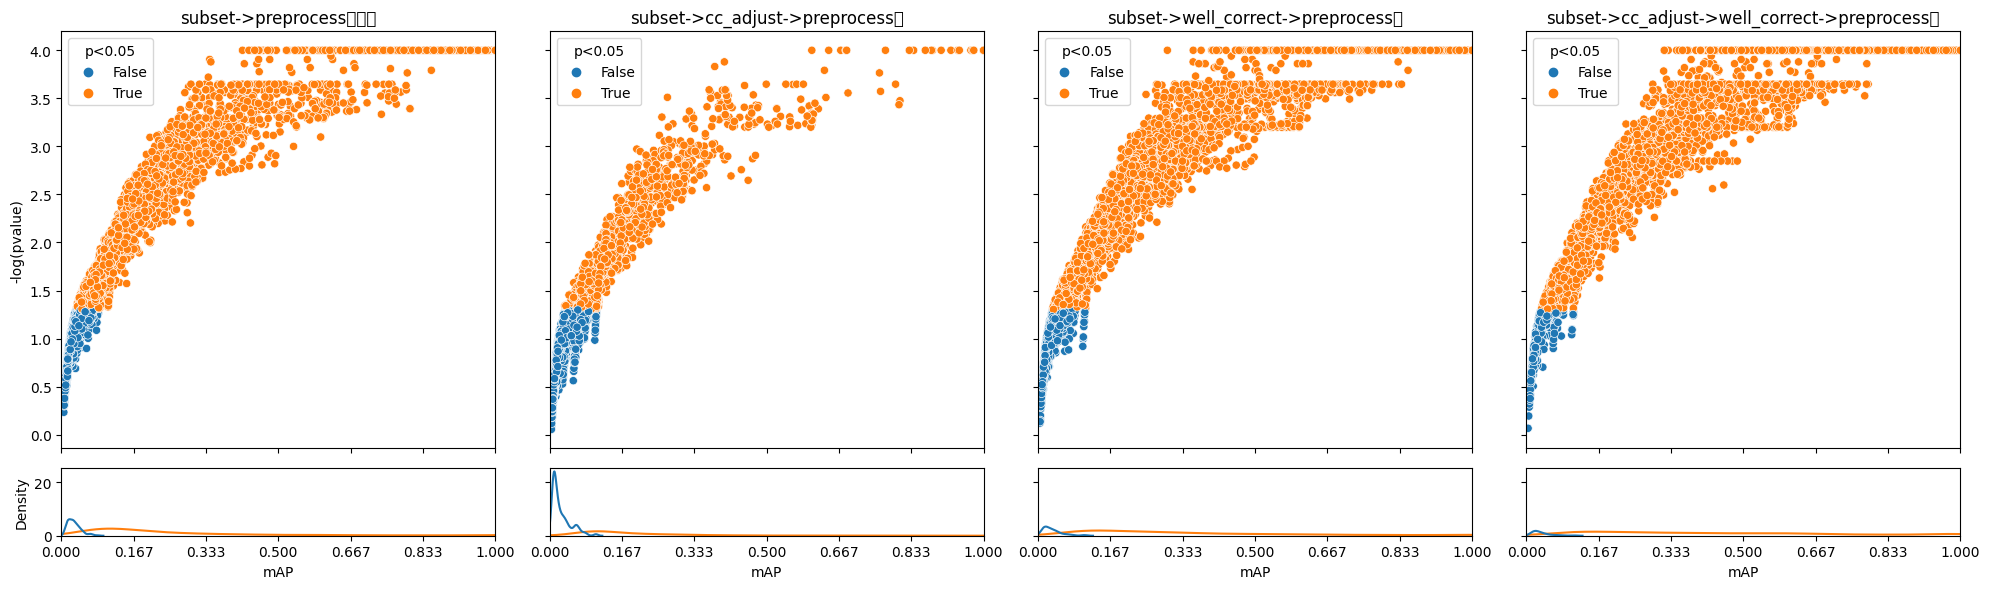

In [10]:
for metrics_df, metrics_label in zip(
    [orf_metrics_df, gene_metrics_df], ["orf", "gene"]
):
    for config in metrics_df.config.unique():
        config_df = metrics_df[metrics_df.config == config]
        plot_map_per_config(
            config_df,
            config,
            figsave_path=FIGSAVE_PATH / f"{metrics_label}_cell_count_adjusted",
        )

#### Image features removed

same_gene_diff_well subset->preprocess			 mmAP: 0.0351 p<0.05: 0.121 (32/264)
same_gene_diff_well subset->cc_adjust->preprocess	 mmAP: 0.0257 p<0.05: 0.0682 (18/264)
same_gene_diff_well subset->well_correct->preprocess	 mmAP: 0.0307 p<0.05: 0.072 (19/264)
same_gene_diff_well subset->cc_adjust->well_correct->preprocess	 mmAP: 0.0232 p<0.05: 0.0795 (21/264)


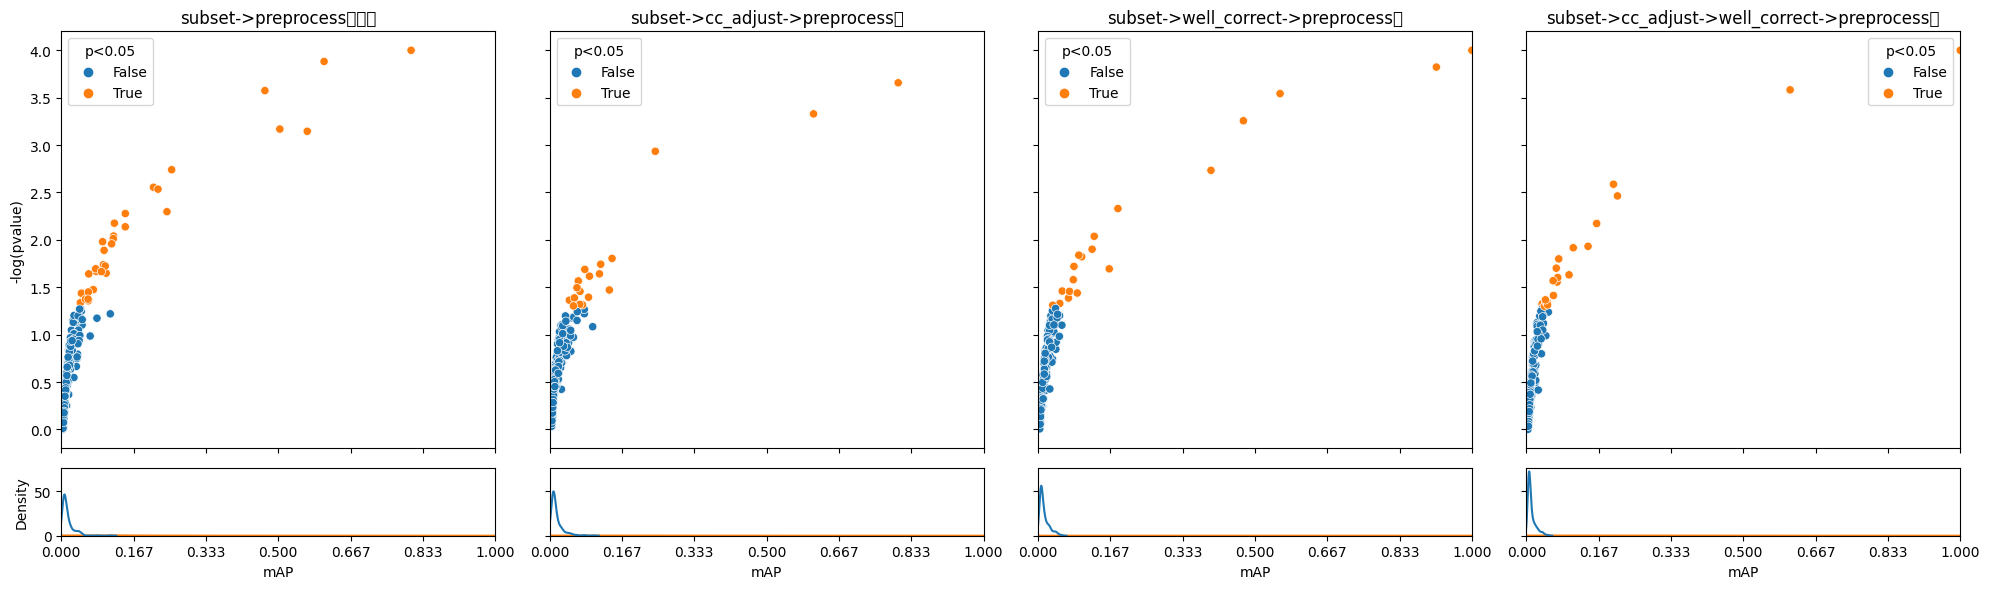

In [16]:
for metrics_df, metrics_label in zip(
    [no_image_gene_metrics_df], ["no_image_gene"]
):
    for config in metrics_df.config.unique():
        config_df = metrics_df[metrics_df.config == config]
        plot_map_per_config(
            config_df,
            config,
            figsave_path=FIGSAVE_PATH / f"{metrics_label}_cell_count_adjusted",
        )

#### Using PCA

same_gene_diff_well subset->preprocess			 mmAP: 0.0338 p<0.05: 0.227 (60/264)
same_gene_diff_well subset->cc_adjust->preprocess	 mmAP: 0.015 p<0.05: 0.00379 (1/264)
same_gene_diff_well subset->well_correct->preprocess	 mmAP: 0.0187 p<0.05: 0.0606 (16/264)
same_gene_diff_well subset->cc_adjust->well_correct->preprocess	 mmAP: 0.0189 p<0.05: 0.0833 (22/264)


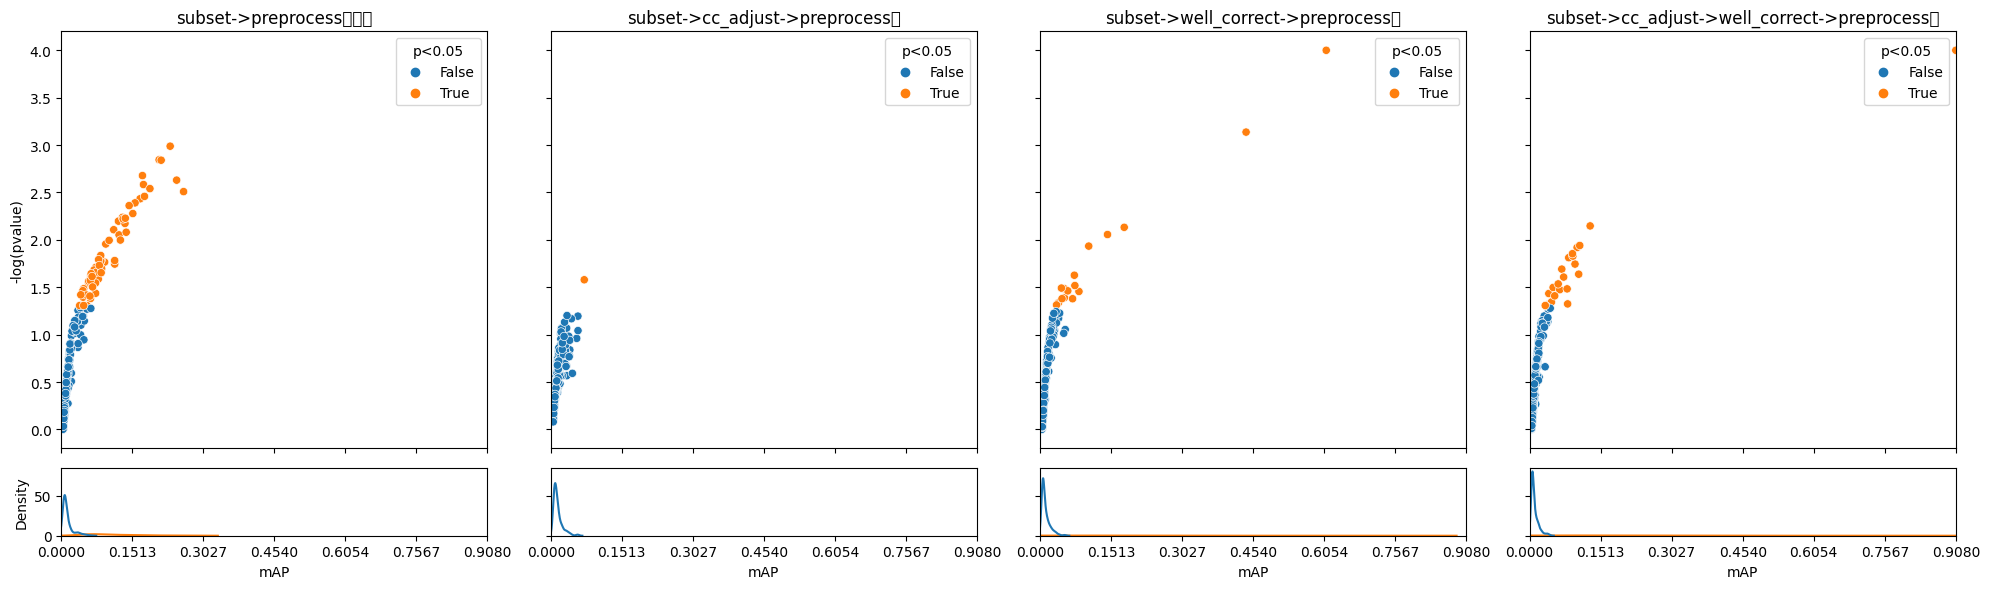

same_gene_diff_well subset->preprocess			 mmAP: 0.0336 p<0.05: 0.11 (29/264)
same_gene_diff_well subset->cc_adjust->preprocess	 mmAP: 0.0152 p<0.05: 0.0114 (3/264)
same_gene_diff_well subset->well_correct->preprocess	 mmAP: 0.0234 p<0.05: 0.0568 (15/264)
same_gene_diff_well subset->cc_adjust->well_correct->preprocess	 mmAP: 0.0198 p<0.05: 0.0833 (22/264)


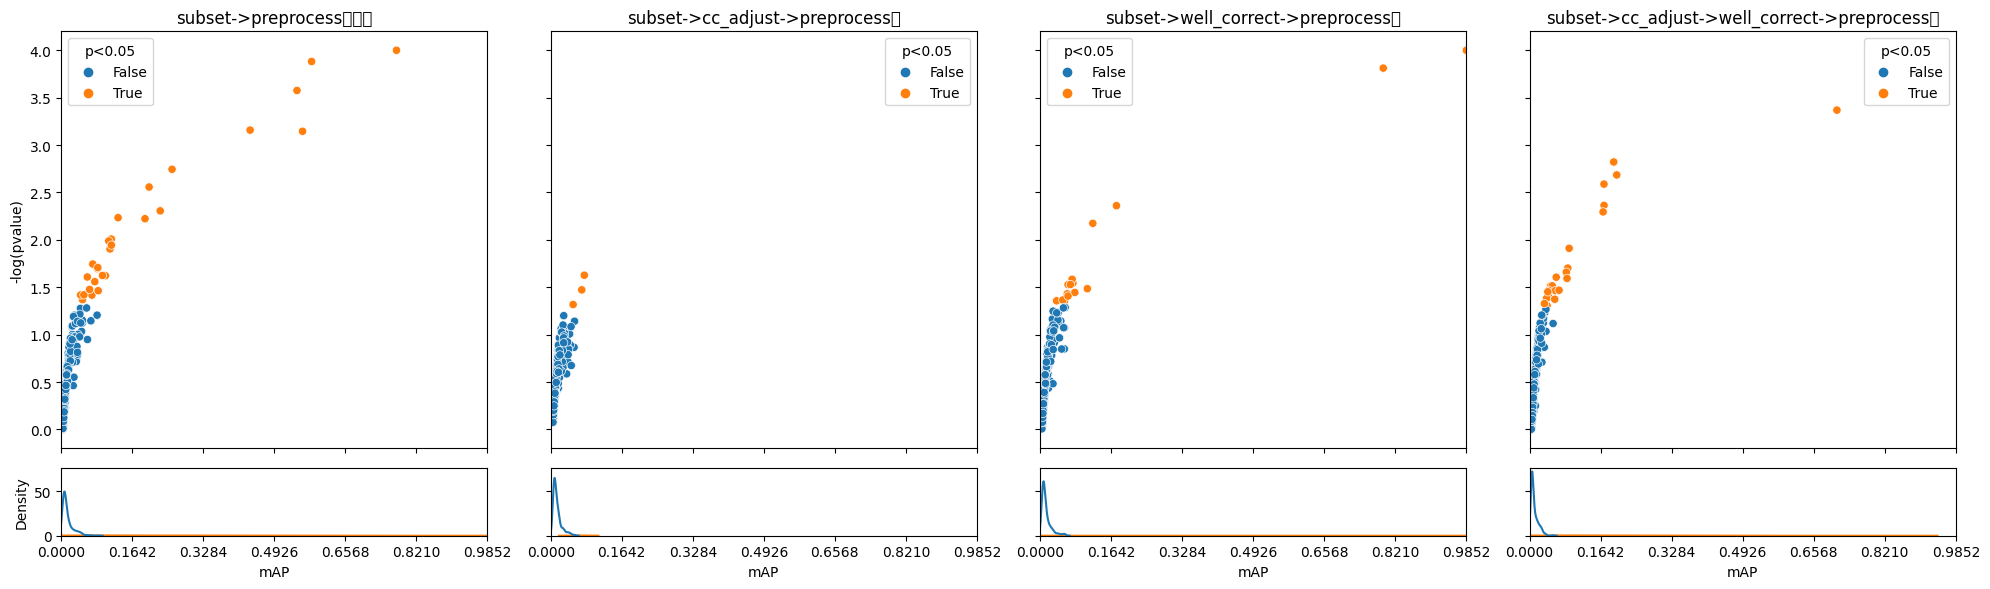

In [24]:
for metrics_df, metrics_label in zip(
    [pca_gene_metrics_df, no_image_pca_gene_metrics_df], ["pca_gene", "no_image_pca_gene"]
):
    for config in metrics_df.config.unique():
        config_df = metrics_df[metrics_df.config == config]
        plot_map_per_config(
            config_df,
            config,
            figsave_path=FIGSAVE_PATH / f"{metrics_label}_cell_count_adjusted",
        )

same_gene_diff_well subset->preprocess			 mmAP: 0.0212 p<0.05: 0.0871 (23/264)
same_gene_diff_well subset->cc_adjust->preprocess	 mmAP: 0.0195 p<0.05: 0.0303 (8/264)
same_gene_diff_well subset->well_correct->preprocess	 mmAP: 0.0203 p<0.05: 0.0379 (10/264)
same_gene_diff_well subset->cc_adjust->well_correct->preprocess	 mmAP: 0.0189 p<0.05: 0.0644 (17/264)


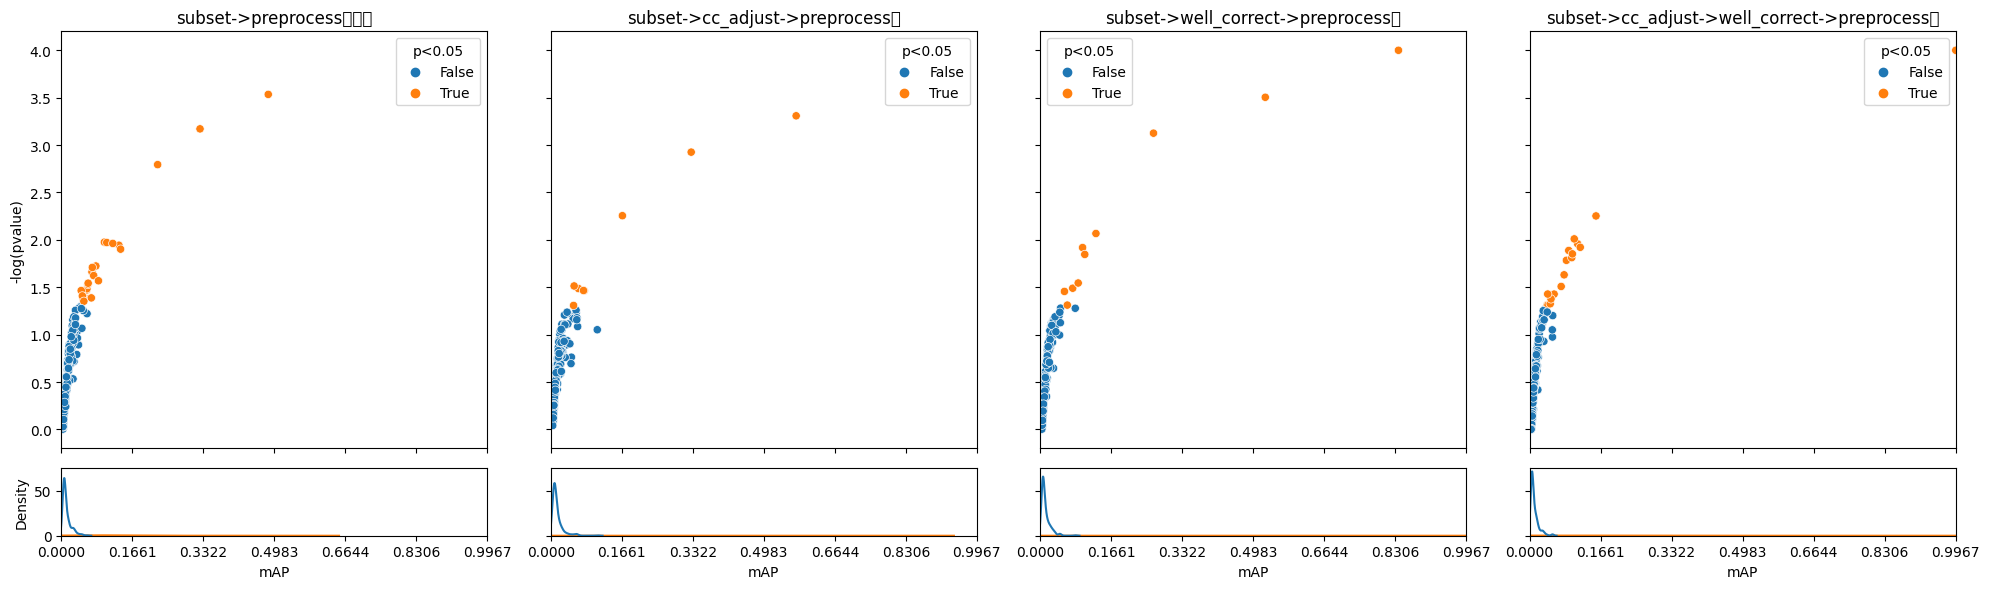

same_gene_diff_well subset->preprocess			 mmAP: 0.0212 p<0.05: 0.0871 (23/264)
same_gene_diff_well subset->cc_adjust->preprocess	 mmAP: 0.0195 p<0.05: 0.0303 (8/264)
same_gene_diff_well subset->well_correct->preprocess	 mmAP: 0.0203 p<0.05: 0.0379 (10/264)
same_gene_diff_well subset->cc_adjust->well_correct->preprocess	 mmAP: 0.0189 p<0.05: 0.0644 (17/264)


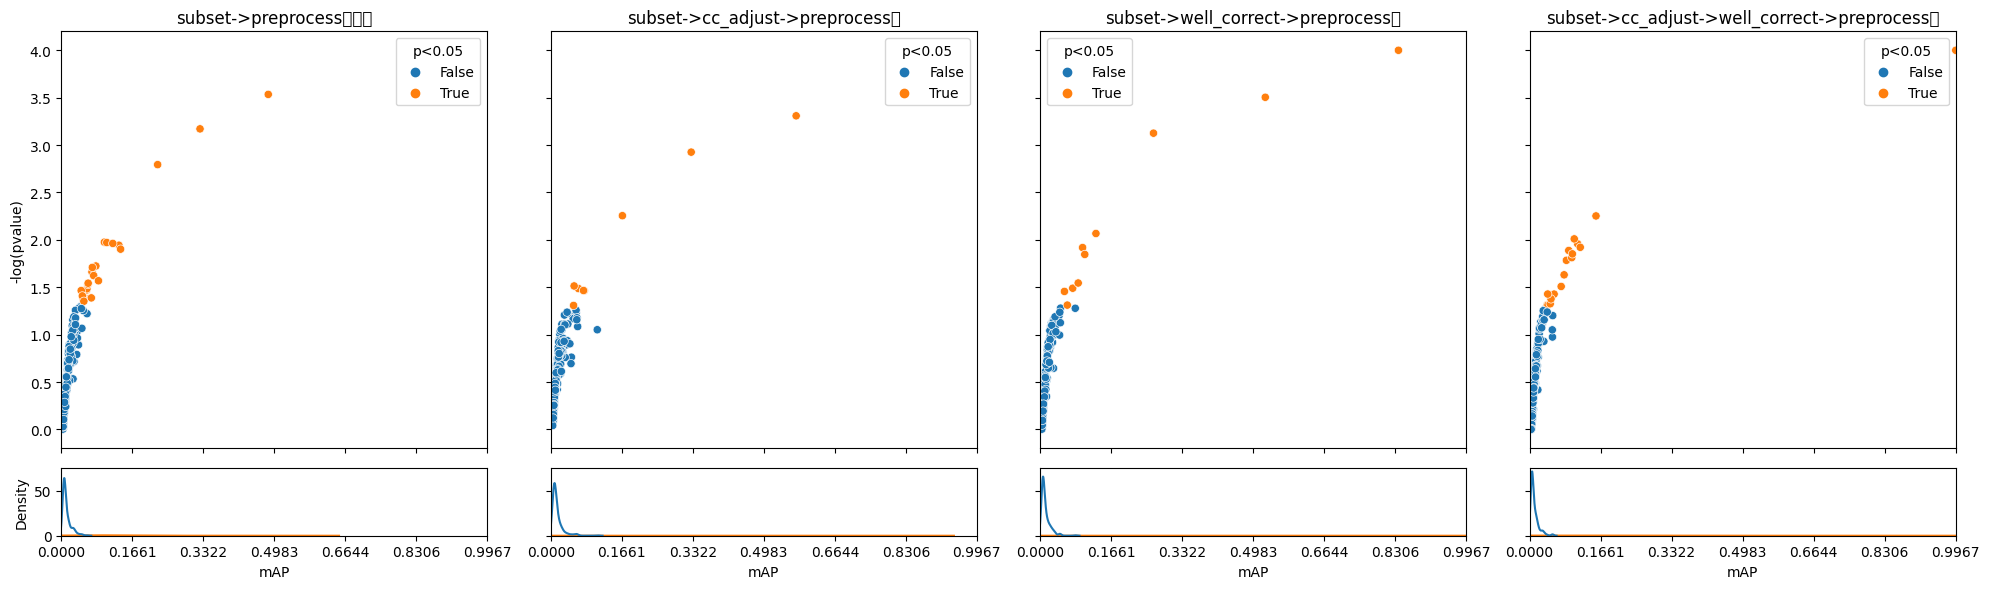

In [18]:
for metrics_df, metrics_label in zip(
    [cospca20_gene_metrics_df, cospca30_gene_metrics_df], ["cospca20_gene", "cospca30_gene"]
):
    for config in metrics_df.config.unique():
        config_df = metrics_df[metrics_df.config == config]
        plot_map_per_config(
            config_df,
            config,
            figsave_path=FIGSAVE_PATH / f"{metrics_label}_cell_count_adjusted",
        )

### Explore relationship between cell count variability and mAP

In [14]:
cell_count_cvar = pd.read_csv("../1.load/output/cell_count_per_orf.csv")
cell_count_cvar

,Metadata_JCP2022,Metadata_Cell_Count_CoV
0,JCP2022_900006,0.052080
1,JCP2022_900008,0.133191
2,JCP2022_900012,0.052447
3,JCP2022_900014,0.084927
4,JCP2022_900015,0.087774
...,...,...
3611,JCP2022_915120,0.098188
3612,JCP2022_915123,0.076138
3613,JCP2022_915125,0.110349
3614,JCP2022_915126,0.052932


#### Merge metrics and cell count CoV on JCP id

The only difference is metrics have `NaNs` due to `same_well_diff_pert`

In [15]:
print(
    "Diff:",
    set(metrics_df.Metadata_JCP2022.unique()).symmetric_difference(
        set(cell_count_cvar.Metadata_JCP2022.unique())
    ),
)

metrics_df = metrics_df.merge(cell_count_cvar, on="Metadata_JCP2022", how="left")
metrics_df.head(3)

AttributeError: 'DataFrame' object has no attribute 'Metadata_JCP2022'

same_well_diff_pert subset->preprocess			 mmAP: 0.0636 p<0.05: 0.139 (51/368)
same_well_diff_pert subset->cc_adjust->preprocess	 mmAP: 0.0583 p<0.05: 0.0217 (8/368)
same_well_diff_pert subset->well_correct->preprocess	 mmAP: 0.114 p<0.05: 0.25 (92/368)
same_well_diff_pert subset->cc_adjust->well_correct->preprocess	 mmAP: 0.379 p<0.05: 0.723 (266/368)


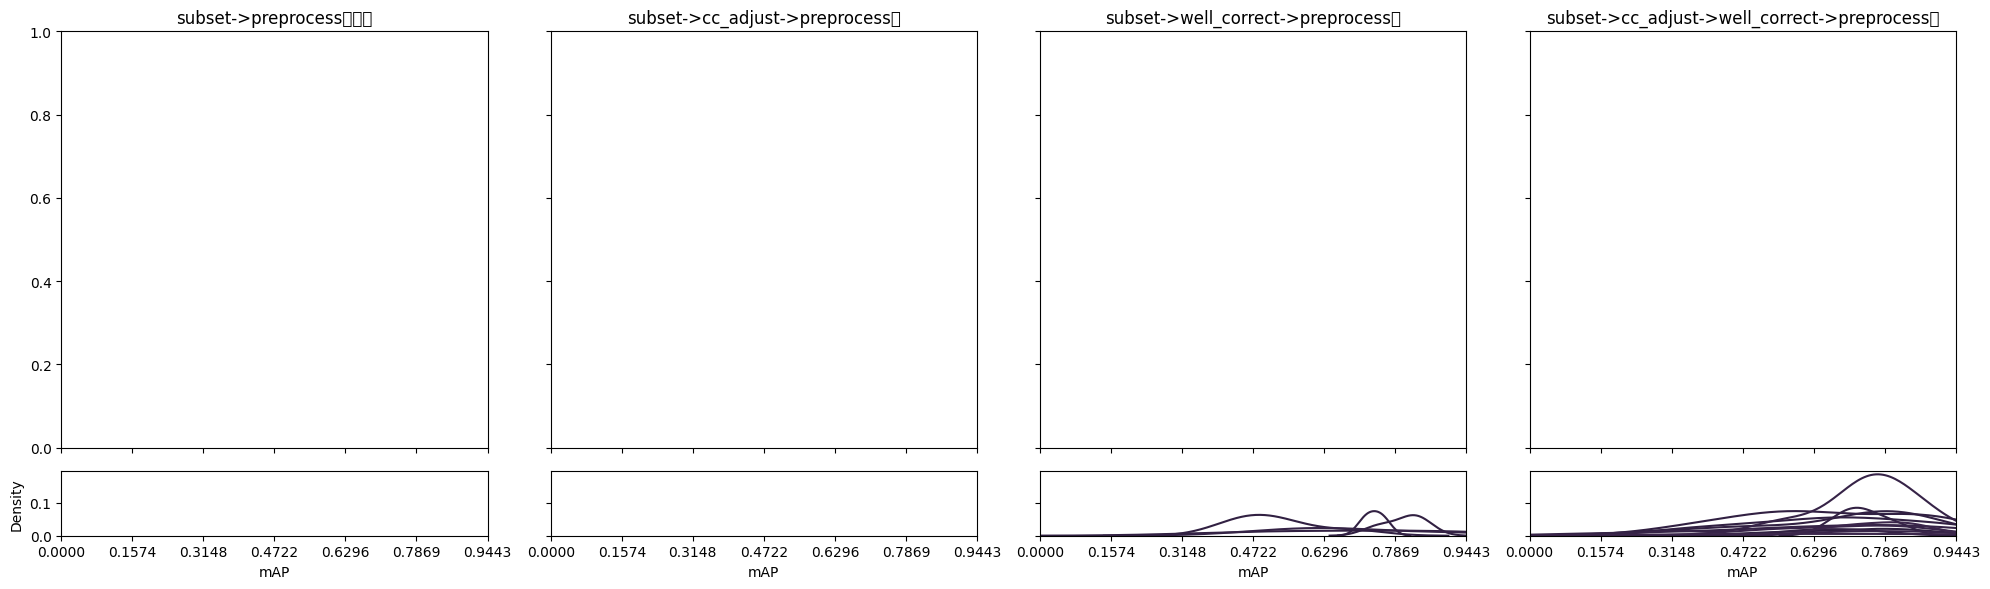

same_pert_diff_well subset->preprocess			 mmAP: 0.00974 p<0.05: 0.0 (0/37)
same_pert_diff_well subset->cc_adjust->preprocess	 mmAP: 0.0202 p<0.05: 0.027 (1/37)
same_pert_diff_well subset->well_correct->preprocess	 mmAP: 0.0166 p<0.05: 0.027 (1/37)
same_pert_diff_well subset->cc_adjust->well_correct->preprocess	 mmAP: 0.00834 p<0.05: 0.0 (0/37)


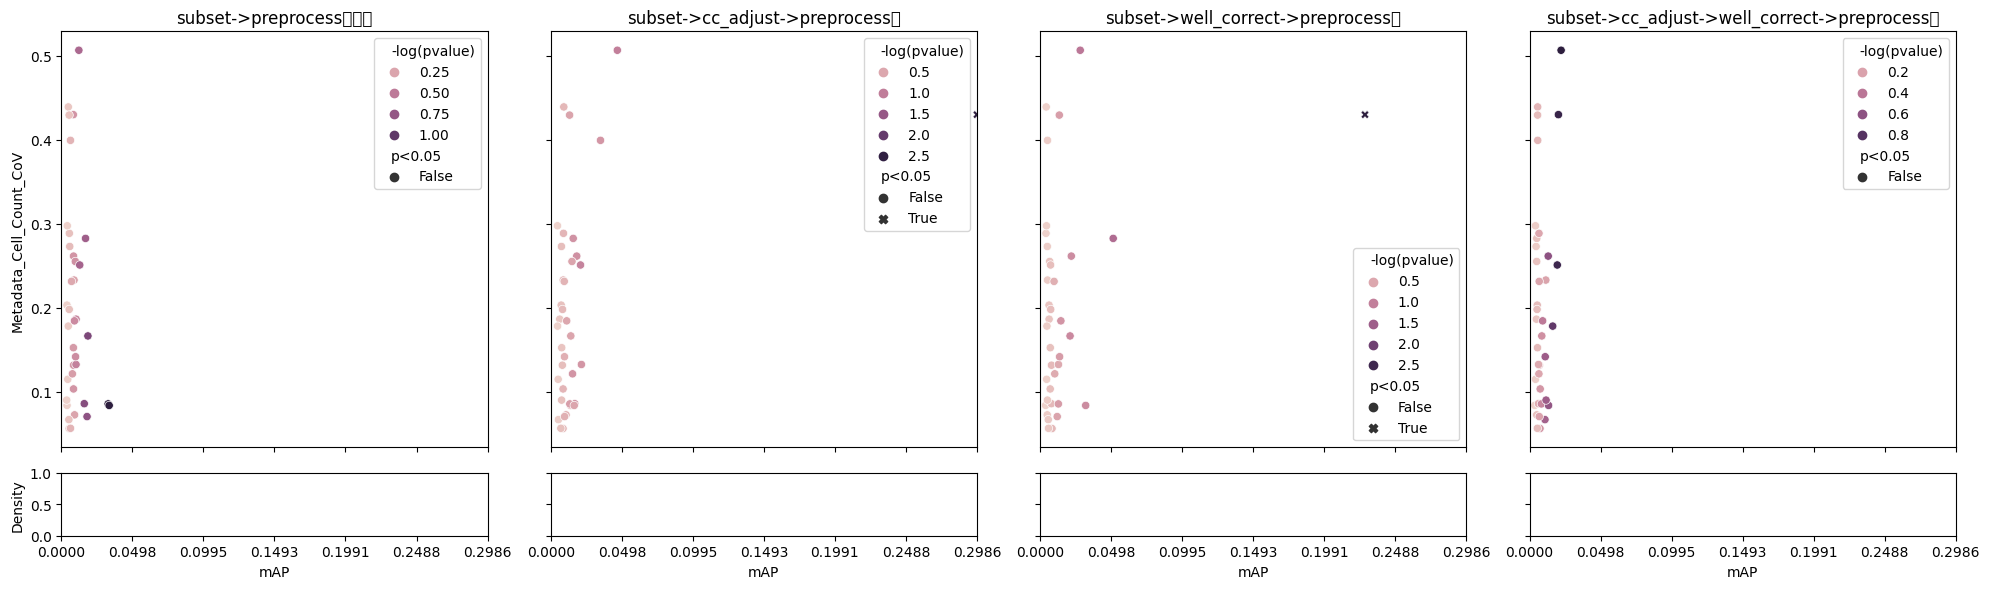

same_well_same_pert subset->preprocess			 mmAP: 0.195 p<0.05: 0.903 (3297/3653)
same_well_same_pert subset->cc_adjust->preprocess	 mmAP: 0.0856 p<0.05: 0.417 (1524/3653)
same_well_same_pert subset->well_correct->preprocess	 mmAP: 0.286 p<0.05: 0.93 (3397/3653)
same_well_same_pert subset->cc_adjust->well_correct->preprocess	 mmAP: 0.538 p<0.05: 0.989 (3612/3653)


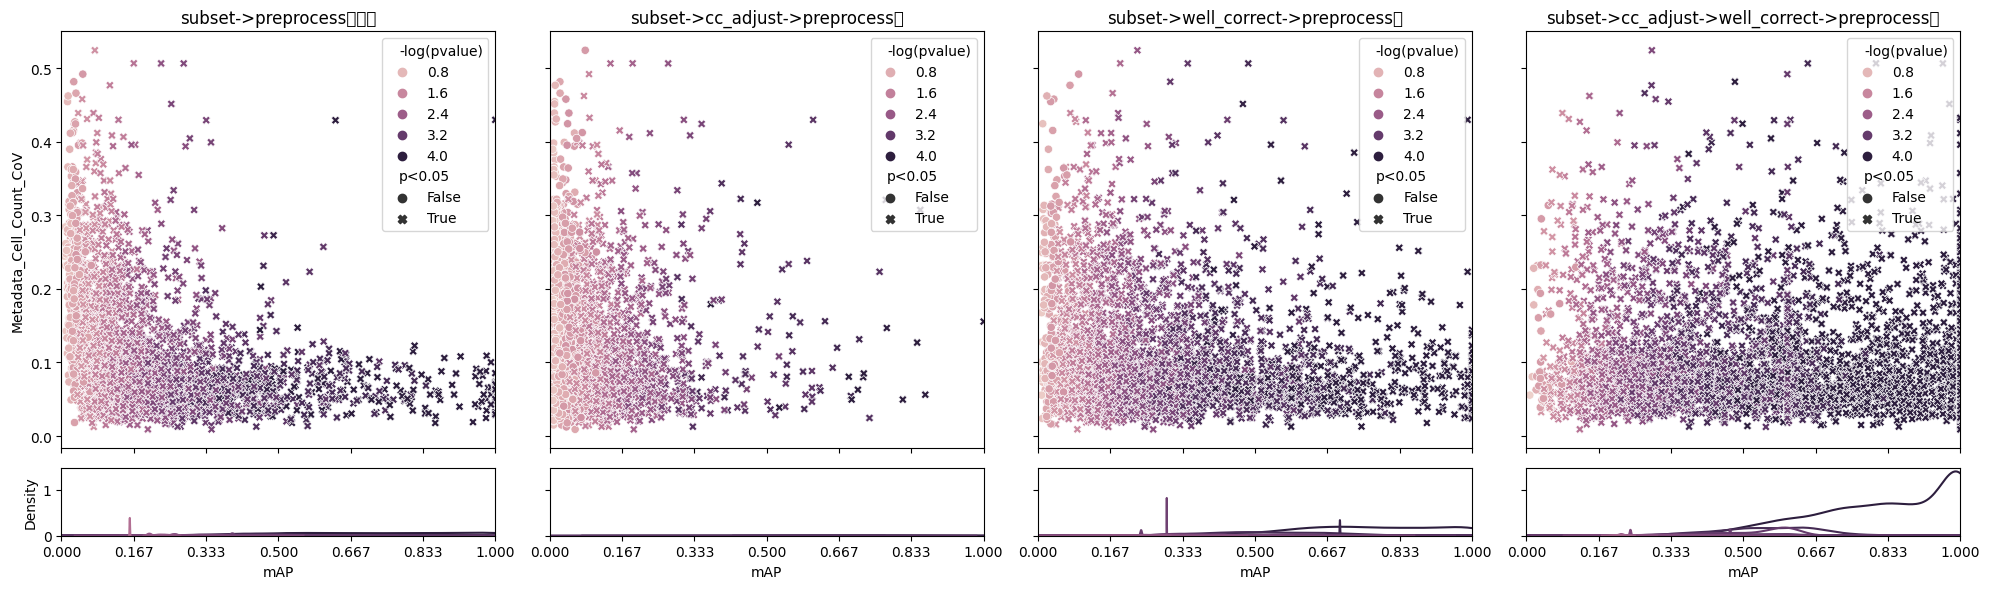

In [ ]:
for config in metrics_df.config.unique():
    config_df = metrics_df[metrics_df.config == config]
    plot_map_per_config(
        config_df,
        config,
        y_col="Metadata_Cell_Count_CoV",
        hue_col="-log(pvalue)",
        style_col="p<0.05",
        figsave_path=FIGSAVE_PATH / "map_vs_ccv",
    )

same_well_diff_pert subset->preprocess			 mmAP: 0.0636 p<0.05: 0.139 (51/368)


ValueError: Axis limits cannot be NaN or Inf

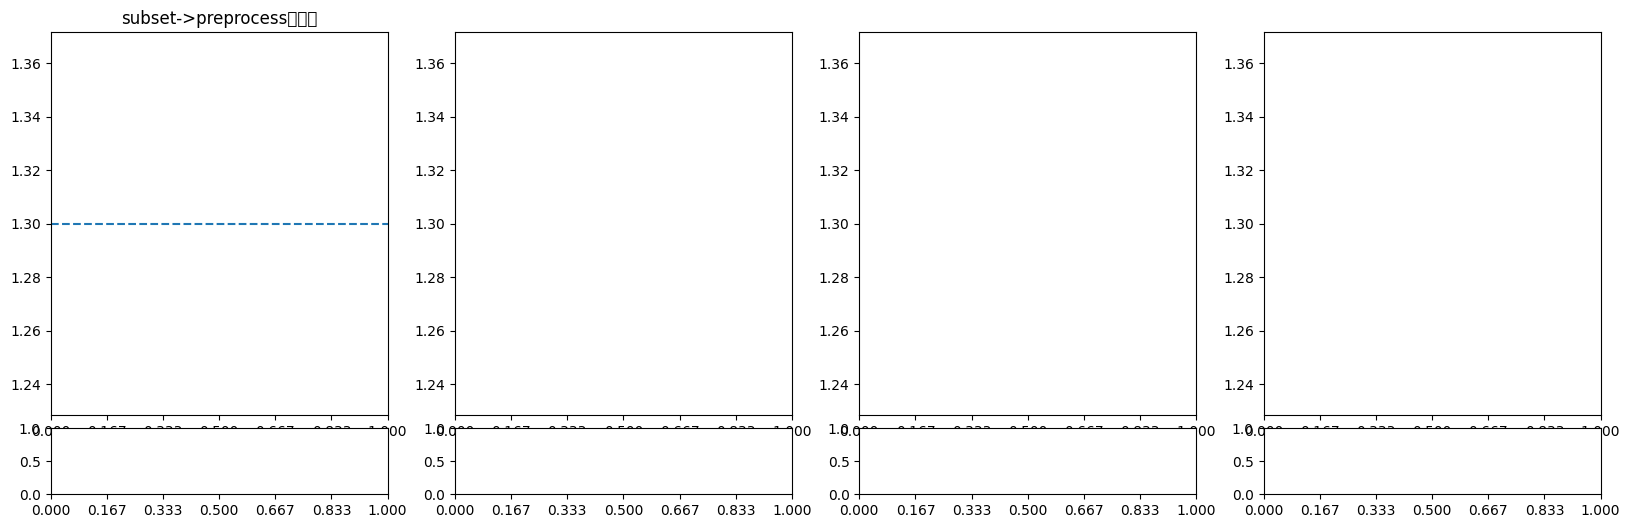

In [ ]:
for config in metrics_df.config.unique():
    config_df = metrics_df[metrics_df.config == config]
    plot_map_per_config(
        config_df,
        config,
        x_col="Metadata_Cell_Count_CoV",
        hue_col="mAP",
        ax_line=1.3,
        figsave_path=FIGSAVE_PATH / "pvalue_vs_ccv",
    )